> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-show appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Describing the features of the data : 
> #### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
> - #### ScheduledDay’ tells us on what day the patient set up their appointment.
> - #### ‘Neighborhood’ indicates the location of the hospital.
> - #### ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> - #### ‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

# Questions :

> #### 1. What is of Percentage of patients who attended their appointments ? 
> #### 2. Which neighborhoods are most no show for appointments ?
>#### 3. Which patients from the following diseases (Alcoholism ,Diabetes,Hypertension) they are more committed to their appointments ?
>#### 4. What is of Percentage of patients who Receive a message or not ?
>#### 5. Do SMS messages make a difference to the patient's attendance or not ? 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling and Cleaning

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [8]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [9]:
df.Diabetes.value_counts()        

0    102584
1      7943
Name: Diabetes, dtype: int64

In [10]:
df.Alcoholism.value_counts() 

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [11]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [12]:
# We have wrong data in "Age" column , Age Can not be zero 
df[df["Age"] < 1] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,71844284745331,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395196662956,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5577525313231,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,614245995575,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,43218463343323,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [13]:
# We replace cell with 0 with mean of age
mean_age = df['Age'].mean()
df[df['Age'] < 1] = mean_age
df[df["Age"] < 1] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
# Drop unneeded columns
df.drop(['AppointmentID', 'PatientId' , 'ScheduledDay'], axis = 1 , inplace=True)

In [15]:
df.rename(columns = {'Hipertension': 'Hypertension',
'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.head(1)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No


In [16]:
# Change No_show column to 0 and 1 to we can plotted in charts
df['No_show'].replace({'No':0,'Yes':1},inplace=True)

In [17]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

Gender                         object
AppointmentDay    datetime64[ns, UTC]
Age                           float64
Neighbourhood                  object
Scholarship                   float64
Hypertension                  float64
Diabetes                      float64
Alcoholism                    float64
Handicap                      float64
SMS_received                  float64
No_show                       float64
dtype: object

In [18]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806,1.384047
std,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885,6.506818
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


In [19]:
df[df['No_show'] > 1]

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
59,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
63,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
64,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
65,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
67,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
...,...,...,...,...,...,...,...,...,...,...,...
110345,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
110346,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
110454,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874
110460,37.0889,1970-01-01 00:00:00.000000037+00:00,37.088874,37.0889,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


In [20]:
df.duplicated().sum()

17722

In [21]:
df.drop_duplicates(keep = False, inplace = True)

In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,81846.000000,81846.000000,81846.000000,81846.000000,81846.000000,81846.000000,81846.000000,81846.000000
mean,39.551059,0.114410,0.236126,0.087897,0.032097,0.026403,0.365809,0.230457
std,22.561141,0.318311,0.424703,0.283146,0.176258,0.175608,0.481659,0.421128
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [24]:
# Function to find only uniquevalues for givin column 
def uniquevalues(Age):
    unVal = set()
    for appointment in appointments:
        unVal.add(appointment[Age])
    return unVal

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81846 entries, 3 to 110525
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          81846 non-null  object             
 1   AppointmentDay  81846 non-null  datetime64[ns, UTC]
 2   Age             81846 non-null  float64            
 3   Neighbourhood   81846 non-null  object             
 4   Scholarship     81846 non-null  float64            
 5   Hypertension    81846 non-null  float64            
 6   Diabetes        81846 non-null  float64            
 7   Alcoholism      81846 non-null  float64            
 8   Handicap        81846 non-null  float64            
 9   SMS_received    81846 non-null  float64            
 10  No_show         81846 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8), object(2)
memory usage: 7.5+ MB


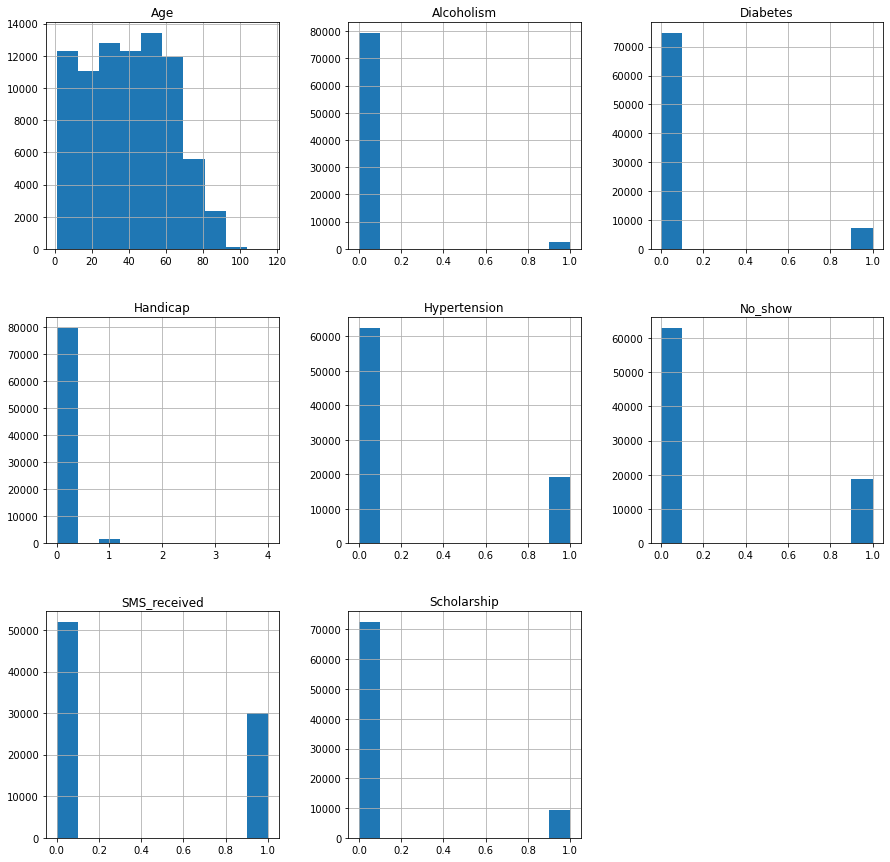

In [26]:
df.hist(figsize=(15,15));

## Now the database has been completely cleaned, Below is a summary of the cleaning  part : 
 > 1.  Check for null values by isna function and no null value. 
 > 2. Droped 17722 duplicates value by drop_duplicates function  
 > 3. Checked for wrong values, And I found the wrong value in the Age column ( Age < 1), And replace the wrong value with a mean age.
 > 4. Checked the types of data, And change the datatype of AppointmentDay to DateTime datatype.
 > 5. Changed  No_show value to 0, 1 to classify the results accordingly.
 > 6. Droped unnecessary columns for my analysis , Droped AppointmentID', 'PatientId' , 'ScheduledDay columns. 
 > 7. corrected wrong columns name.

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 (What is of Percentage of patients who attended their appointments ? )

In [27]:
df.No_show.value_counts()

0.0    62984
1.0    18862
Name: No_show, dtype: int64

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
shown = df['No_show'] == 0
not_shown = df['No_show'] == 1
df['shown'] = shown
df['not_shown'] = not_shown

0.0    62984
1.0    18862
Name: No_show, dtype: int64
29.947288200177823


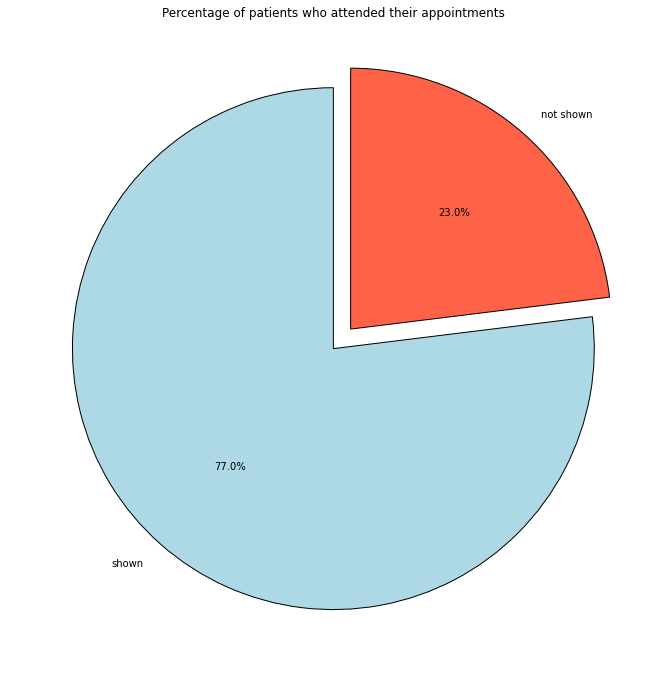

In [29]:
x = df["No_show"].value_counts()
print(x)
percent_no_show = x[1] / x[0].sum()*100
print(percent_no_show)
slide = [x[0]  ,x[1]]
label = ['shown' , "not shown"]
color = ["lightblue" , "tomato"]
explode = [0,0.1]
plt.pie(slide ,startangle= 90 , labels = label ,colors=color,explode = explode,autopct='%1.1f%%' ,wedgeprops={'edgecolor' : 'black'})
plt.title("Percentage of patients who attended their appointments")
fig = plt.gcf()
fig.set_size_inches(12,12);


> - The percentage of patients who attended their appointments is 77% 

###  Question 2  (Which neighborhoods are most no show for appointments ?)

In [30]:
shows_by_neighbourhood = df.groupby("Neighbourhood")["No_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_neighbourhood.head(5)

,Neighbourhood,count
38,JARDIM CAMBURI,3657
43,MARIA ORTIZ,3083
59,RESISTÊNCIA,2895
36,ITARARÉ,2626
39,JARDIM DA PENHA,2614


> - Top 5 neighborhoods by no-shows

###  Question 3  (Which patients from the following diseases (Alcoholism ,Diabetes,Hypertension) they are more committed to their appointments ?)

<ipython-input-31-35808eb04322>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('No_show' , as_index=True)['Alcoholism','Hypertension','Diabetes'].mean())


         Alcoholism  Hypertension  Diabetes
No_show                                    
0.0        0.031706      0.250873  0.092484
1.0        0.033400      0.186884  0.072580


<ipython-input-31-35808eb04322>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('No_show')['Alcoholism','Hypertension','Diabetes'].mean().plot(kind='bar', figsize=(15,15))


Text(0, 0.5, 'Diseases')

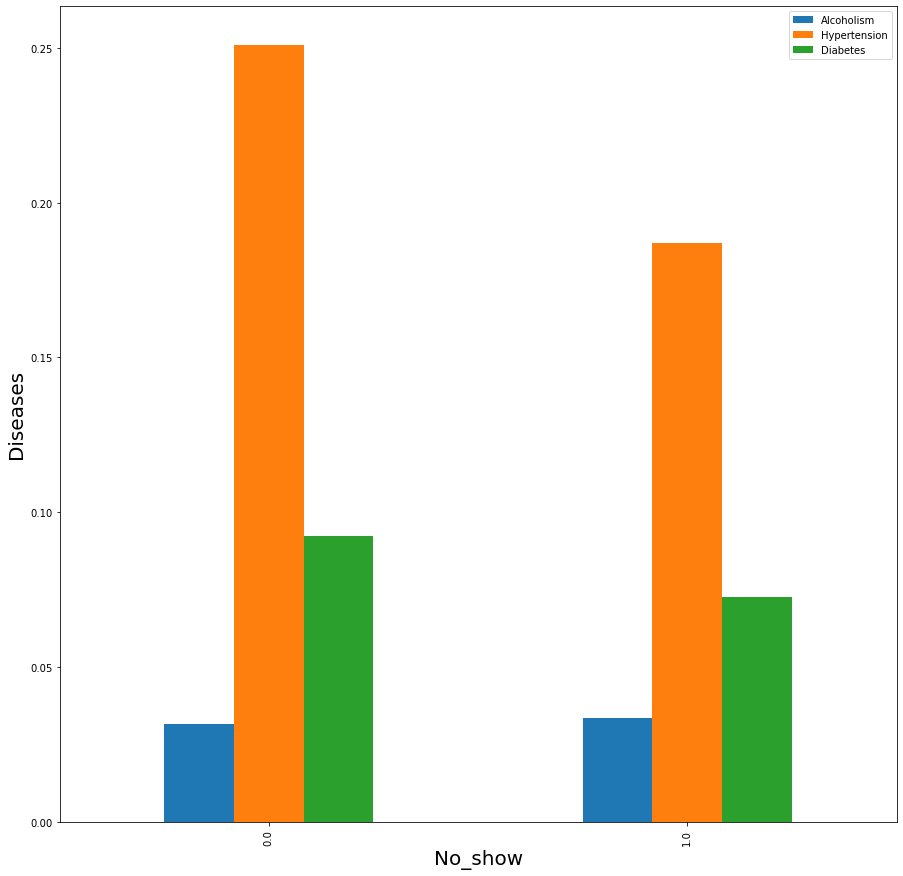

In [31]:
print(df.groupby('No_show' , as_index=True)['Alcoholism','Hypertension','Diabetes'].mean())
df.groupby('No_show')['Alcoholism','Hypertension','Diabetes'].mean().plot(kind='bar', figsize=(15,15))
plt.xlabel('No_show', fontsize=20)
plt.ylabel('Diseases', fontsize=20)


> - Hypertension patients are the most committed to their appointment

In [32]:
df.groupby('No_show')['Alcoholism','Diabetes','Hypertension'].sum()

<ipython-input-32-41065d8427af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('No_show')['Alcoholism','Diabetes','Hypertension'].sum()


,Alcoholism,Diabetes,Hypertension
No_show,,,
0.0,1997.0,5825.0,15801.0
1.0,630.0,1369.0,3525.0


###  Question 4  (What is of Percentage of patients who Receive a message or not ?)

0.0    62984
1.0    18862
Name: No_show, dtype: int64
57.68119292567333


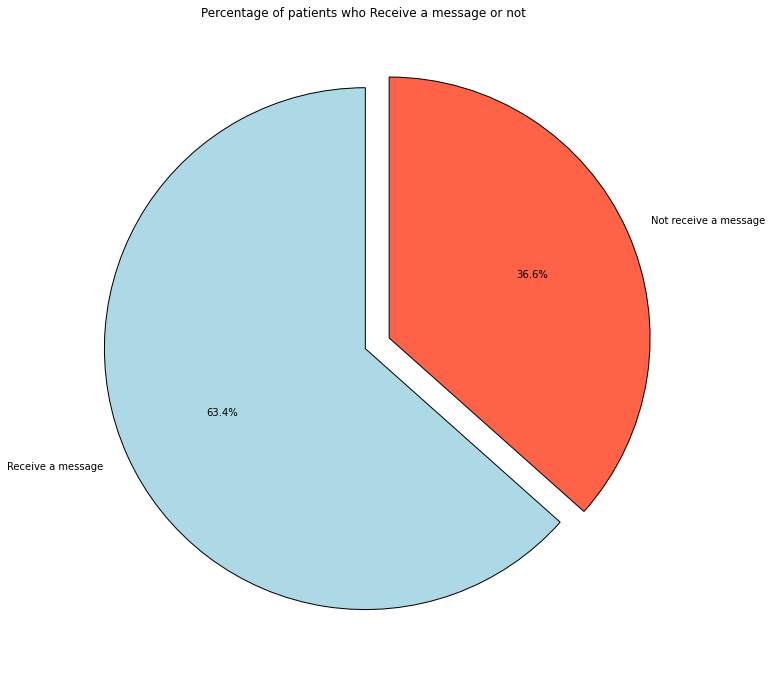

In [33]:
y = df["SMS_received"].value_counts()
print(x)
percent_no_show = y[1] / y[0].sum()*100
print(percent_no_show)
slide = [y[0]  ,y[1]]
label = ['Receive a message' , "Not receive a message"]
color = ["lightblue" , "tomato"]
explode = [0,0.1]
plt.pie(slide ,startangle= 90 , labels = label ,colors=color,explode = explode,autopct='%1.1f%%' ,wedgeprops={'edgecolor' : 'black'})
plt.title("Percentage of patients who Receive a message or not ")
fig = plt.gcf()
fig.set_size_inches(12,12);

>  - 63.4% of patient Receive an SMS appointment reminder

###  Question 5 (Do SMS messages make a difference to the patient's attendance or not?)

SMS_received
0.0    0.194120
1.0    0.293454
Name: No_show, dtype: float64


Text(0, 0.5, 'count of tweets')

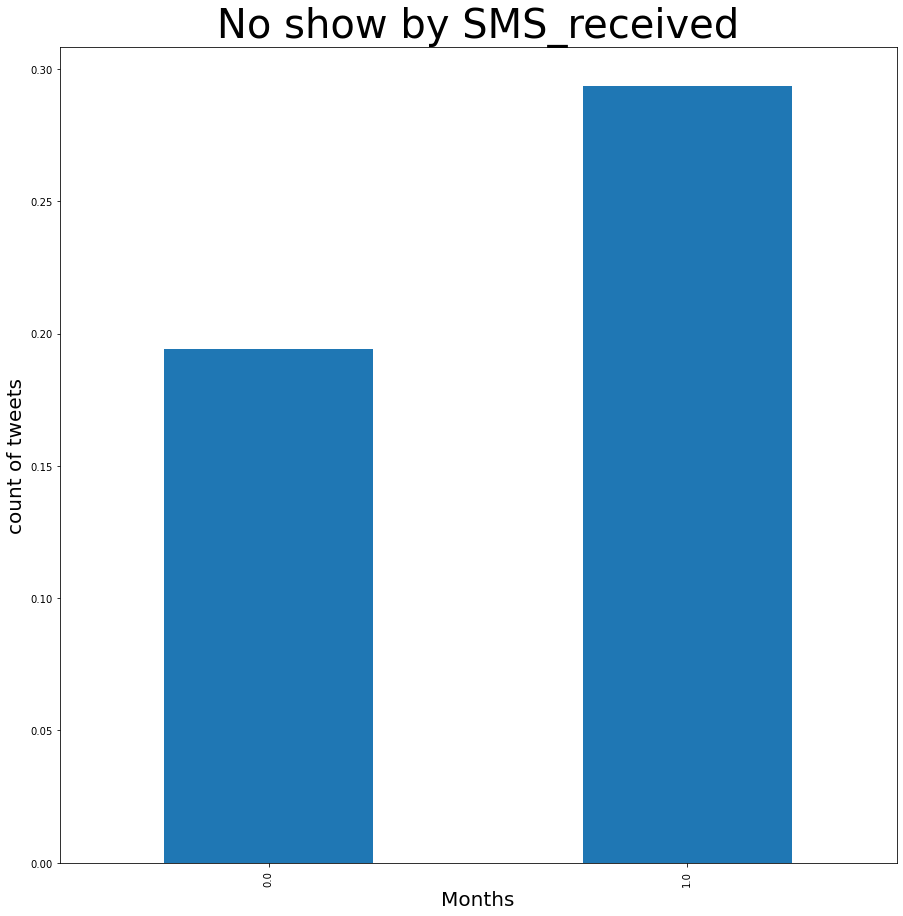

In [34]:
print(df.groupby('SMS_received' , as_index=True)['No_show'].mean())
df.groupby('SMS_received')['No_show'].mean().plot(kind='bar', figsize=(15,15))
plt.title('No show by SMS_received', fontsize=40)
plt.xlabel('Months', fontsize=20)
plt.ylabel('count of tweets', fontsize=20)

> - But as we have seen in the analysis, SMS messages were not useful as a reminder of appointments, as those who received messages were the most absents from the appointment. 

###  Question 6 (Comparison between patients they have scholarships and patients they have not )

Scholarship
0.0    0.772012
1.0    0.750427
Name: shown, dtype: float64


Text(0, 0.5, 'count of tweets')

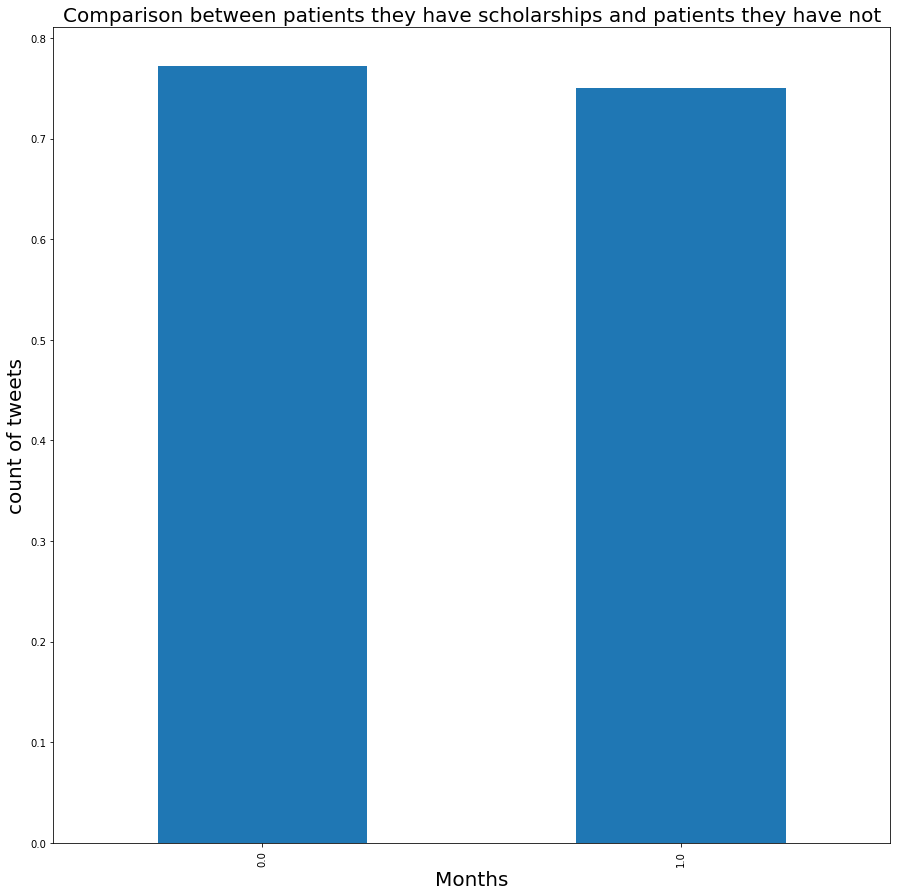

In [35]:
#Comparison between patients they have scholarships and patients they have not  
print(df.groupby('Scholarship')['shown'].mean())
df.groupby('Scholarship')['shown'].mean().plot(kind='bar', figsize=(15,15))
plt.title('Comparison between patients they have scholarships and patients they have not', fontsize=20)
plt.xlabel('Months', fontsize=20)
plt.ylabel('count of tweets', fontsize=20)

> - patients Whose they have not scholarships more committed to their appointment.

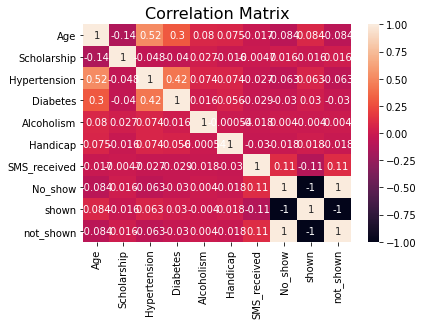

In [36]:
corrMatrix  = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix', fontsize=16);
plt.show()


> - correlation matrix show relationships between variables.

<a id='conclusions'></a>
## Conclusions
- The percentage of patients who attended their appointments is 79.9%, I think that the show percentage is supposed to be much higher because it is a predetermined appointment and with patient satisfaction 
- Hypertension patients are the most committed to their appointment, And They are also the most absent their appointments , But there was still a large number of no-shows for Hypertension patients
- 67.3% patient Receive an SMS appointment reminder
- But as we have seen in the analysis, SMS messages were not useful as a reminder of appointments, as those who received messages were the most absents from the appointment
- patients Whose they have not scholarships more committed to their appointment, but with a slight difference with patients Whose they have scholarships 

## Limitations
 > - Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not , or whether the patient have a series medical issue or not.
 > - A column of the number of absences from the appointment, if any, can help predict attendance or not. 
